In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from utils import *
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics

In [2]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations = 3000, print_cost=True):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector 
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    initialize_parameters_deep, compute_cost, update_parameters are loaded from utils
    
    """
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.

        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

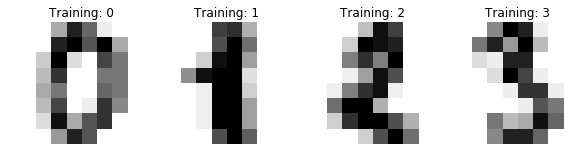

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.4, shuffle=False
)


In [5]:

m = len(y_train)
num_labels = 10

y_one_hot = np.zeros((num_labels,m))


for i in range(m):
    
    ind=y_train[i]
    y_one_hot[ind,i] = 1

Y = y_one_hot
X_scaled = X_train/16.
X = X_scaled.T

print(Y.shape)
print(X.shape)


(10, 1078)
(64, 1078)


In [6]:
layers_dims = [64, 25, 10] #  L-layer model

In [13]:
parameters, costs = L_layer_model(X, Y, layers_dims, learning_rate = 0.2, num_iterations = 2000, print_cost = True)


Cost after iteration 0: 7.381834214087141
Cost after iteration 100: 0.9068161101662283
Cost after iteration 200: 0.484468193485973
Cost after iteration 300: 0.3464743975204495
Cost after iteration 400: 0.2740391147216142
Cost after iteration 500: 0.2262265749822302
Cost after iteration 600: 0.19183240318645162
Cost after iteration 700: 0.1661298576617718
Cost after iteration 800: 0.14638475484861838
Cost after iteration 900: 0.1307887209591968
Cost after iteration 1000: 0.11797009291173949
Cost after iteration 1100: 0.10715797985683839
Cost after iteration 1200: 0.09784756985232292
Cost after iteration 1300: 0.0897181385755805
Cost after iteration 1400: 0.08250541185455224
Cost after iteration 1500: 0.07603501103664126
Cost after iteration 1600: 0.07026639329576387
Cost after iteration 1700: 0.06510440660093826
Cost after iteration 1800: 0.06047954368907068
Cost after iteration 1900: 0.05626436588867452
Cost after iteration 1999: 0.05241021770605631


In [14]:
predicted_labels, listofi = predict(X, Y, parameters)
print('List of mislabeled images: ', listofi)


Number of mislabeled images:  2
Accuracy: 99.72
List of mislabeled images:  [475, 580]
List of mislabeled images:  [475, 580]


In [15]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

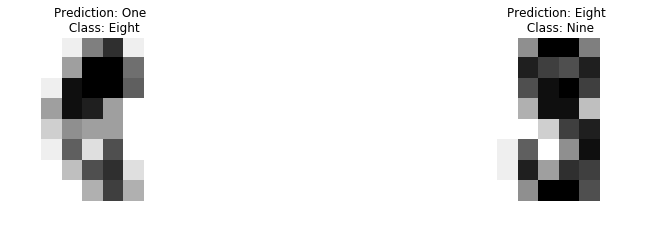

In [19]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
for ax, i in zip(axes, listofi):
    ax.set_axis_off()
    ax.imshow(X[:,i].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Prediction: " + classes[np.argmax(predicted_labels[:,i])] + " \n Class: " + classes[np.argmax(Y[:,i])])


In [17]:
m = len(y_test)
num_labels = 10

y_one_hot = np.zeros((num_labels,m))


for i in range(m):
    
    ind=y_test[i]
    y_one_hot[ind,i] = 1

Y = y_one_hot
X_scaled = X_test/16.
X = X_scaled.T

print(Y.shape)
print(X.shape)


(10, 719)
(64, 719)


In [18]:
predicted_labels, listofi = predict(X, Y, parameters)

Number of mislabeled images:  2
Accuracy: 99.72
List of mislabeled images:  [475, 580]
